# This notebook was created for CA4 of B8IT105

Both csv used for this CA were downloaded from Kaggle's "Uncover Covid-19 Challange"
https://www.kaggle.com/roche-data-science-coalition/uncover/metadata

I'm going to use pandas library to do an analysis of covid data in Ireland and Portugal, aiming to compare number of cases with mobility data.

The two csv files I'm going to use are:
-johns-hopkins-covid-19-daily-dashboard-cases-over-time.csv (contains covid19 data over time)
-regional-mobility.csv (mobility data provided from google)

In [1]:
!pip install plotly_express

First I'm going to start by importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
#To strat I'm importing the csv files into data frames
cases = pd.read_csv('johns-hopkins-covid-19-daily-dashboard-cases-over-time.csv')
mobility = pd.read_csv('regional-mobility.csv')

In [4]:
#Next functions were used to analyse the data tables
print(cases.dtypes)
print(mobility.dtypes)

country_region          object
last_update             object
confirmed                int64
deaths                   int64
recovered              float64
active                 float64
delta_confirmed          int64
delta_recovered        float64
incident_rate          float64
people_tested          float64
people_hospitalized    float64
province_state          object
fips                   float64
uid                      int64
iso3                    object
report_date_string      object
dtype: object
country                  object
region                   object
date                     object
retail                  float64
grocery_and_pharmacy    float64
parks                   float64
transit_stations        float64
workplaces              float64
residential             float64
dtype: object


Let«s look first at the Cases dataset

In [5]:
cases.columns

Index(['country_region', 'last_update', 'confirmed', 'deaths', 'recovered',
       'active', 'delta_confirmed', 'delta_recovered', 'incident_rate',
       'people_tested', 'people_hospitalized', 'province_state', 'fips', 'uid',
       'iso3', 'report_date_string'],
      dtype='object')

In [6]:
cases.head()

,country_region,last_update,confirmed,deaths,recovered,active,delta_confirmed,delta_recovered,incident_rate,people_tested,people_hospitalized,province_state,fips,uid,iso3,report_date_string
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-23
2,Afghanistan,2020-01-24,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-24
3,Afghanistan,2020-01-25,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-25
4,Afghanistan,2020-01-26,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-26


In [7]:
#Let's first have a look at the most recent values
#dropping columns with no values
cases = cases.dropna(axis='columns')
#Obtaining the max date from our data frame
max_date = cases['last_update'].max()
max_date

'2020-04-28'

In [8]:
#creating a boolean variable to return the rows with the max date
is_latest_case = cases['last_update'] == cases['last_update'].max()
is_latest_case

0        False
1        False
2        False
3        False
4        False
         ...  
23809    False
23810    False
23811    False
23812    False
23813     True
Name: last_update, Length: 23814, dtype: bool

In [9]:
#filtering our dataframe with the most recent data
latest_cases = cases[is_latest_case]
#there are contries with more than a single uid for different regions, in order to present data by country we will sum data grouping by country name
latest_cases = latest_cases.drop(['report_date_string','uid'],axis=1)
latest_cases

,country_region,last_update,confirmed,deaths,delta_confirmed
97,Afghanistan,2020-04-28,1828,58,125
195,Albania,2020-04-28,750,30,14
293,Algeria,2020-04-28,3649,437,132
391,Andorra,2020-04-28,743,41,0
489,Angola,2020-04-28,27,2,0
...,...,...,...,...,...
23421,US,2020-04-28,14339,492,801
23519,US,2020-04-28,13842,786,156
23617,US,2020-04-28,1095,38,32
23715,US,2020-04-28,6289,300,208


In [10]:
latest_cases.rename(columns={'country_region': 'country'}, inplace = True)
latest_cases.loc[latest_cases['country'] == "US", "country"] = "USA"
latest_cases = latest_cases.groupby('country').sum()
latest_cases['latest_date'] = max_date
latest_cases #the groupby function transforms as well the column country_region as the index of the data frame

,confirmed,deaths,delta_confirmed,latest_date
country,,,,
Afghanistan,1828,58,125,2020-04-28
Albania,750,30,14,2020-04-28
Algeria,3649,437,132,2020-04-28
Andorra,743,41,0,2020-04-28
Angola,27,2,0,2020-04-28
...,...,...,...,...
West Bank and Gaza,343,2,1,2020-04-28
Western Sahara,6,0,0,2020-04-28
Yemen,1,0,0,2020-04-28


In [11]:
#creating a new column for the mortality rate
latest_cases["mortality_rate"] = np.round(100*latest_cases["deaths"]/latest_cases["confirmed"],2)
latest_cases.sort_values('confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Purples',subset=["delta_confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["mortality_rate"])

,confirmed,deaths,delta_confirmed,latest_date,mortality_rate
country,,,,,
USA,2025164,116710,48770,2020-04-28,5.760000
Spain,232128,23822,2706,2020-04-28,10.260000
Italy,201505,27359,2091,2020-04-28,13.580000
France,169053,23694,3090,2020-04-28,14.020000
United Kingdom,162350,21745,4002,2020-04-28,13.390000
Germany,159912,6314,1154,2020-04-28,3.950000
Turkey,114653,2992,2392,2020-04-28,2.610000
Russia,93558,867,6411,2020-04-28,0.930000
Iran,92584,5877,1112,2020-04-28,6.350000


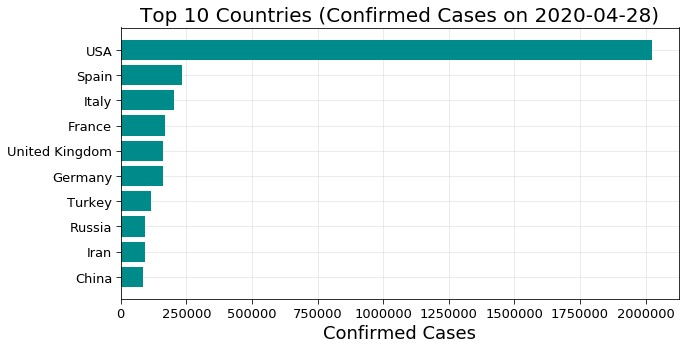

In [12]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(latest_cases.sort_values('confirmed')['confirmed'].index[-10:],latest_cases.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases on " + max_date + ")",fontsize=20)
plt.grid(alpha=0.3)

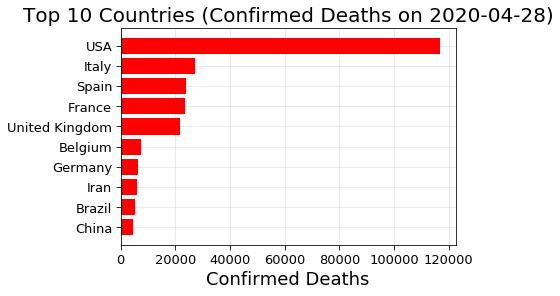

In [13]:
plt.axes(axisbelow=True)
plt.barh(latest_cases.sort_values('deaths')['deaths'].index[-10:],latest_cases.sort_values('deaths')["deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Deaths",fontsize=18)
plt.title("Top 10 Countries (Confirmed Deaths on " + max_date + ")",fontsize=20)
plt.grid(alpha=0.3)

In [20]:
temp_df = pd.DataFrame(latest_cases['confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["confirmed"]), # using a log10 ratio for the map coloring
                    hover_name="country", # column to add to hover information
                    hover_data=["confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale) on " + max_date)
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="sunset")
#fig.to_image('GlobalHeatMapconfirmed.jpeg')
fig.show()


In [21]:
temp_df = pd.DataFrame(latest_cases['deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["deaths"]+1), # using a log10 ratio for the map coloring
                    hover_name="country", # column to add to hover information
                    hover_data=["deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Deaths Heat Map (Log Scale) on " + max_date)
fig.update_coloraxes(colorbar_title="Confirmed Deaths (Log Scale)",colorscale="Reds")
fig.show()


In [28]:
latest_cases = latest_cases.reset_index()

fig = px.scatter(latest_cases, y=latest_cases.loc[:,"mortality_rate"],
                    x= latest_cases.loc[:,"confirmed"],
                    color= "country", hover_name="confirmed",
                    hover_data=["confirmed","deaths","country"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Confirmed cases vs Mortality rate',
                    size = np.power(latest_cases["confirmed"]+1,0.3)-0.5,
                    size_max = 30,
                    height =600,
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(title_text="Mortality Rate (%)")
fig.update_xaxes(title_text="Confirmed Cases")
fig.show()

ValueError: cannot insert level_0, already exists

In [29]:
#Example code from documentation
iris = px.data.iris()
px.scatter(iris, x="sepal_width", y="sepal_length")
#Enjoy the visualization, hopefully :D 